In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df= pd.read_csv("../data/processed/filtered_stock_with_indicators.csv")

df.head()

,date,high,low,close,total_transaction,price_change,daily_change,daily_return,year,month,day-of-week,is-weekend,SMA-10,SMA-50,EMA_10,EMA_50,RSI_14,close_prev_day
0,2010-04-15,2040.0,2000.0,2000.0,6935470.0,NaN,40.0,NaN,2010,4,3,0,NaN,NaN,2000.000000,2000.000000,NaN,NaN
1,2010-04-19,2039.0,2000.0,2001.0,3549542.0,1.0,39.0,0.05,2010,4,0,0,NaN,NaN,2000.181818,2000.039216,100.000000,2000.0
2,2010-04-20,1975.0,1945.0,1945.0,2369304.0,-56.0,30.0,-2.80,2010,4,1,0,NaN,NaN,1990.148760,1997.880815,-1.571947,2001.0
3,2010-04-21,1908.0,1800.0,1810.0,3531917.0,-135.0,108.0,-6.94,2010,4,2,0,NaN,NaN,1957.394440,1990.512940,-0.410932,1945.0
4,2010-04-22,1831.0,1775.0,1831.0,2156607.0,21.0,56.0,1.16,2010,4,3,0,NaN,NaN,1934.413633,1984.257531,-15.756324,1810.0


In [3]:
df[['high', 'low', 'total_transaction', 'close']].corr()

,high,low,total_transaction,close
high,1.000000,0.999014,0.062108,0.999488
low,0.999014,1.000000,0.052364,0.999328
total_transaction,0.062108,0.052364,1.000000,0.056213
close,0.999488,0.999328,0.056213,1.000000


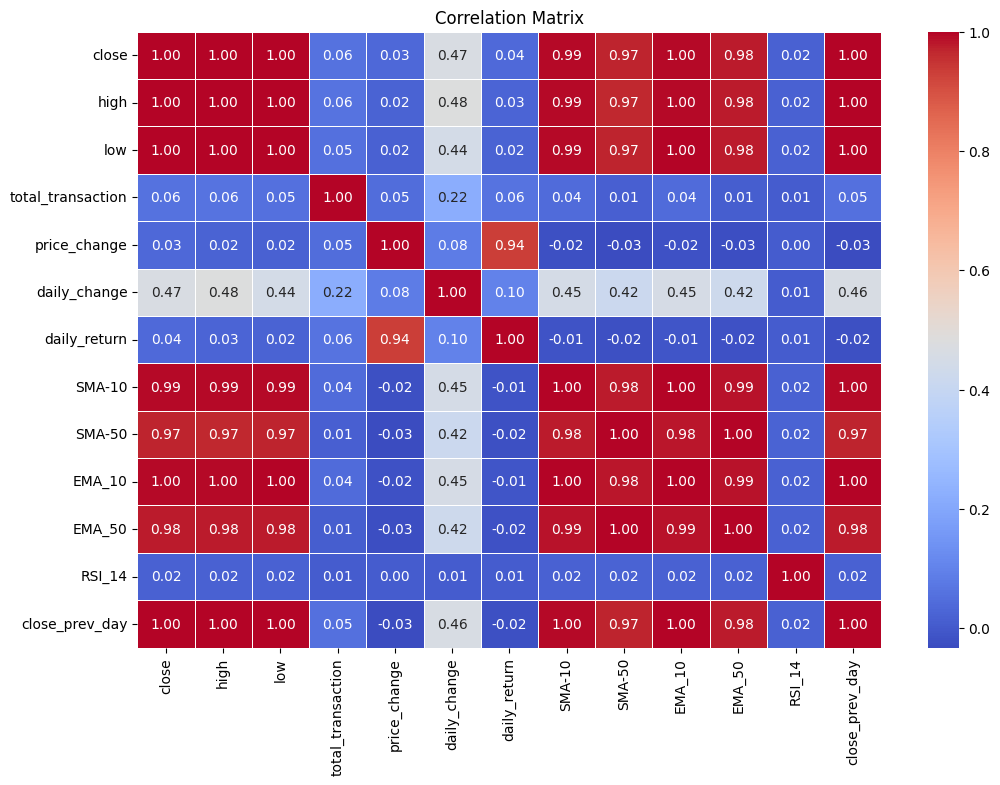

In [4]:
correlation_columns = ['close', 'high', 'low', 'total_transaction', 'price_change', 'daily_change', 
                       'daily_return', 'SMA-10', 'SMA-50', 'EMA_10', 'EMA_50', 'RSI_14', 'close_prev_day']

# Compute the correlation matrix
correlation_matrix = df[correlation_columns].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [5]:
# X= df[['high', 'low', 'total_transaction', 'price_change', 'daily_change', 'daily_return', 'SMA-10', 'SMA-50', 'EMA_10', 'EMA_50', 'RSI_14', 'close_prev_day']]
feature_cols= ['SMA-10', 'SMA-50', 'EMA_10', 'EMA_50', 'RSI_14']
X= df[feature_cols]
y= df[['close']].values.ravel() #converting value to 1D array, as random forest regressor always takes 1


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [6]:
# df.isna().sum()

# print(X_train.shape)
# print(X_test.shape)

rf_model= RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred= rf_model.predict(X_test)
mae= mean_absolute_error(y_test, y_pred)
print("Mean absolute error: ", mae)



Mean absolute error:  12.03179458646616


In [7]:
# df.isna().sum()

# print(X_train.shape)
# print(X_test.shape)

rf_model= RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred= rf_model.predict(X_test)
mae= mean_absolute_error(y_test, y_pred)
print("Mean absolute error: ", mae)



Mean absolute error:  12.03179458646616


Hyperparamter Tuning

In [30]:
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': list(range(10, 20)), 
    'min_samples_split':  [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)
grid_search= GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

best_params= grid_search.best_params_
print("Best Parameters: ", best_params)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s


In [31]:
print("Best Parameters: ", best_params)

Best Parameters:  {'bootstrap': True, 'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [32]:
best_rf= RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

y_pred_optimized= best_rf.predict(X_test)
print("Mean Absolute Error using best-param: ", mean_absolute_error(y_test, y_pred_optimized))

Mean Absolute Error using best-param:  11.95359434673508


Using XGBoost

In [9]:
from xgboost import XGBRegressor

In [10]:
xgb_model= XGBRegressor(n_estimators=500, learning_rate= 0.05, max_depth=6, random_state=42)

xgb_model.fit(X_train, y_train)
y_pred_xgb= xgb_model.predict(X_test)
print("Mean Absolute Error using XGB: ", mean_absolute_error(y_test, y_pred_xgb))

Mean Absolute Error using XGB:  11.62139737466224


In [11]:
param_grid = {
    'n_estimators': [100, 300, 500],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Step size
    'max_depth': [3, 6, 9],  # Tree depth
    'subsample': [0.8, 1.0],  # Sample ratio
    'colsample_bytree': [0.8, 1.0]  # Feature sample ratio
}


In [12]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_error', verbose=2)

In [13]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 500, 'subsample': 0.8}


In [14]:
best_xgb = XGBRegressor(**grid_search.best_params_, objective='reg:squarederror', random_state=42)
best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)
print("Fine-Tuned MAE using XGBoost: ", mean_absolute_error(y_test, y_pred))

Fine-Tuned MAE using XGBoost:  11.065045166015626
